In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
x_data = np.linspace(-0.5, 0.5, 200)[:,np.newaxis] # (200, 1)
noise = np.random.normal(0, 0.02, x_data.shape)
y_data = np.square(x_data) + noise

x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

In [3]:
weight_L1 = tf.Variable(tf.random_normal([1,10]))
bias_L1 = tf.Variable(tf.zeros([1, 10]))
hidden_output_L1 = tf.matmul(x, weight_L1) + bias_L1
final_output_L1 = tf.nn.tanh(hidden_output_L1)

weight_L2 = tf.Variable(tf.random_normal([10, 1]))
bias_L2 = tf.Variable(tf.zeros([1, 1]))
hidden_output_L2 = tf.matmul(final_output_L1, weight_L2) + bias_L2
prediction = tf.nn.tanh(hidden_output_L2)

In [4]:
loss = tf.reduce_mean(tf.square(y - prediction))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

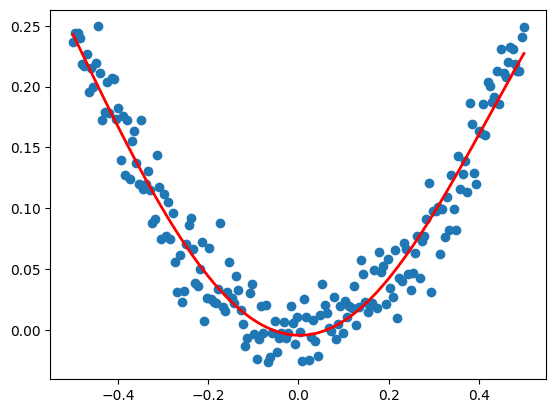

In [5]:
with tf.Session() as session:
  session.run(tf.global_variables_initializer()) # An Op that initializes global variables in the graph
  for i in range(2000):
    session.run(train_step, feed_dict={x:x_data, y:y_data})

  prediction_value = session.run(prediction, feed_dict={x:x_data})

  plt.figure()
  plt.scatter(x_data, y_data)
  plt.plot(x_data, prediction_value, 'r-', linewidth=2)
  plt.show()